In [2]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
first_5_Records_train = train.head().T
first_5_Records_test = test.head().T
print(first_5_Records_train)
print(first_5_Records_test)

                          0         1         2             3         4
Loan_ID            LP001002  LP001003  LP001005      LP001006  LP001008
Gender                 Male      Male      Male          Male      Male
Married                  No       Yes       Yes           Yes        No
Dependents                0         1         0             0         0
Education          Graduate  Graduate  Graduate  Not Graduate  Graduate
Self_Employed            No        No       Yes            No        No
ApplicantIncome        5849      4583      3000          2583      6000
CoapplicantIncome       0.0    1508.0       0.0        2358.0       0.0
LoanAmount              NaN     128.0      66.0         120.0     141.0
Loan_Amount_Term      360.0     360.0     360.0         360.0     360.0
Credit_History          1.0       1.0       1.0           1.0       1.0
Property_Area         Urban     Rural     Urban         Urban     Urban
Loan_Status               Y         N         Y             Y   

In [7]:
# Lets concat train and test
concated_train_test = pd.concat([train,test],axis=0)
print(concated_train_test.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [8]:
#Information of table: Number rows,columns,column data types, Non null counts
print('Train Data Information')
train_info = train.info()
print(train_info)
print('\nshape\n',train.shape)

Train Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

shape
 (614, 13)


In [9]:
print("Null Values Count(train_test)")
print(concated_train_test.isnull().sum())

print("\n\n")
print("Unique Values (train_test)")
print(concated_train_test.nunique(dropna=True))


# Train data info
print('\n train data null values')
print(train.isnull().sum())
print("\n\n")
print("Unique Values Train data")
print(train.nunique(dropna=True)) # Missing value/ Null not included as unique

Null Values Count(train_test)
Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64



Unique Values (train_test)
Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

 train data null values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14

In [10]:
# stats of train dataset
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [11]:
# Features and uniue values for categorical columns of train dataset
features = list(train.columns)
count = 1
for i in features:
  if i in ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    continue
  else:
    print(f'{count}) Colum name: {i} and its unique values:  {train[i].dropna().unique()} and unique values: {train[i].nunique(dropna=True)}' ) # dropna excludes missing values
    count = count+1

1) Colum name: Gender and its unique values:  ['Male' 'Female'] and unique values: 2
2) Colum name: Married and its unique values:  ['No' 'Yes'] and unique values: 2
3) Colum name: Dependents and its unique values:  ['0' '1' '2' '3+'] and unique values: 4
4) Colum name: Education and its unique values:  ['Graduate' 'Not Graduate'] and unique values: 2
5) Colum name: Self_Employed and its unique values:  ['No' 'Yes'] and unique values: 2
6) Colum name: Credit_History and its unique values:  [1. 0.] and unique values: 2
7) Colum name: Property_Area and its unique values:  ['Urban' 'Rural' 'Semiurban'] and unique values: 3
8) Colum name: Loan_Status and its unique values:  ['Y' 'N'] and unique values: 2


**Cotegorical Data**

1. Gender
2. Married
3. Education
4. Self_Employeed
5. Credit_History
6. Property_Area
7. Loan Status

**Numerical Data**

1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount
4. Loan_Amount_Term
5. Dependents

#**Dealing Missing Value**

In [12]:
# In feature and unique values we saw lots of missing or null values.

print('\n train data null values')
print(train.isnull().sum())
print("\n Total Rows:",train.shape[0])


 train data null values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Total Rows: 614


- Credit history has highest missing values in train dataset. It's nearly 8% missing data and we have to deal with it.
- LoanID is unique for each row and has no missing values
- Education, ApplicantIncome, CoapplicantIncome, Property_Area, Loan_Status   : No  Missing values
- Gender      : 13 missing values
- Married     : Only 3 missing values
- Dependents  : 15 missing values

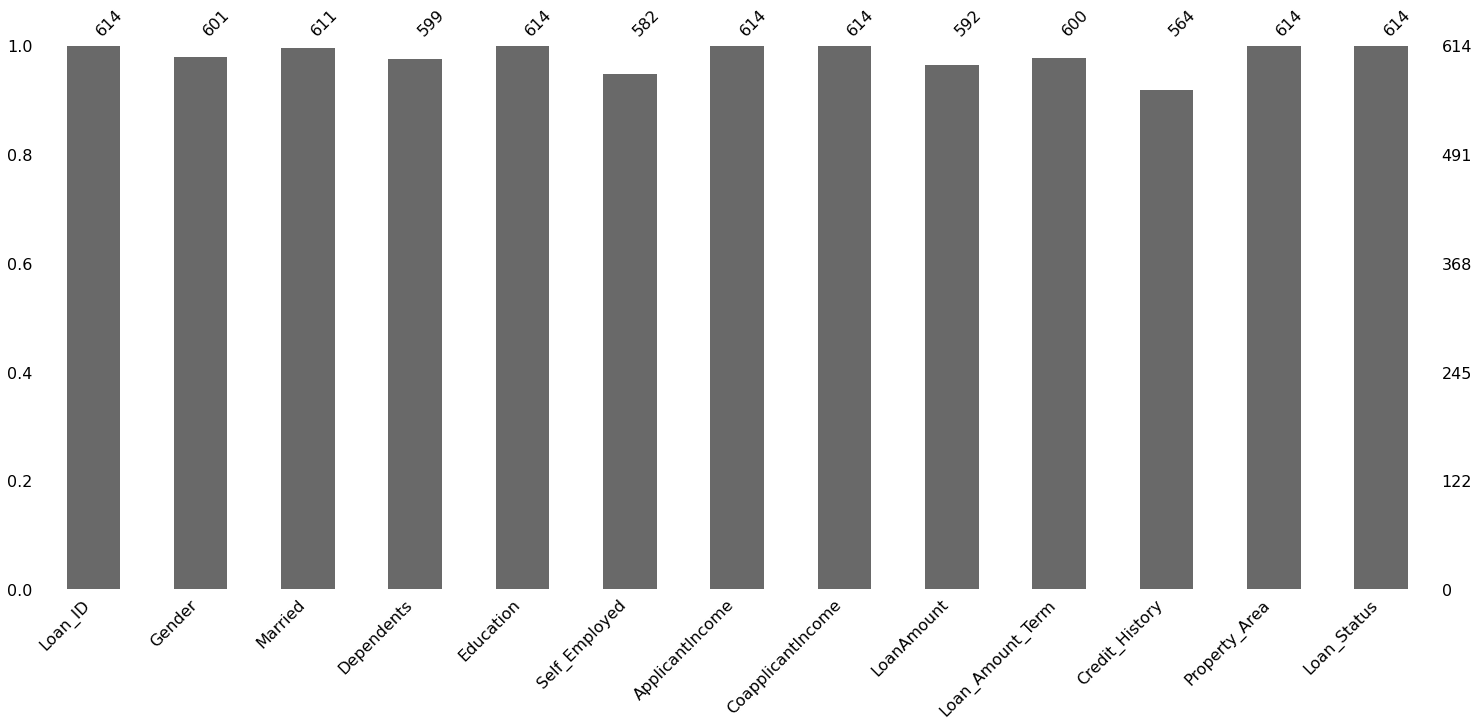

In [13]:
# Creating bar graph for missing values
import missingno as msno
msno.bar(train)

In [14]:
# Handling missing values for numerical data
'''
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Dependents
'''
# Dependents 3+ means at least 4 so we will consider 3+ as 4. It will helpful for further operation
train['Dependents'].loc[(train['Dependents']=='3+')]=4
train['Dependents'].loc[(train['Dependents']=='0')]=0
train['Dependents'].loc[(train['Dependents']=='1')]=1
train['Dependents'].loc[(train['Dependents']=='2')]=2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
# As we see data is numerical but we can consider it as categorical because we can make categories of it.(0,1,2,4)
# So we use mean for numerical and mode for categorical data. Here we check for both
import math
print("Mean=",math.ceil(train['Dependents'].mean()))
print("Mode=",train['Dependents'].mode()[0])

Mean= 1
Mode= 0


In [34]:
train.value_counts('Dependents')

Dependents
0    360
1    102
2    101
4     51
dtype: int64

- Mean and Mode for Dependents is 1 and 0 respectively.
- I consider Mode. To replace missing values

In [17]:
# Filling missing values of Dependents column with mode value and that is 0.
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [18]:
# Filling missing values of LoanAmount with round value of mean
print(math.ceil(train['LoanAmount'].mean()))
train['LoanAmount'].fillna(math.ceil(train['LoanAmount'].mean()), inplace=True)

147


In [19]:
# Filling missing values of Loan_Amount_Term with round value of mean
print(math.ceil(train['Loan_Amount_Term'].mean()))
train['Loan_Amount_Term'].fillna(math.ceil(train['Loan_Amount_Term'].mean()), inplace=True)

342


- Handle missing values for Categorical data

In [20]:
# Assign Male=0 and Female=1
train['Gender'].loc[train['Gender']=='Male']=0
train['Gender'].loc[train['Gender']=='Female']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# Assigning mode value to missing values
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [22]:
# Assign Married No=0, Yes=1
train['Married'].loc[train['Married']=='No']=0
train['Married'].loc[train['Married']=='Yes']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
# Assigning mode value to missing values
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [38]:
# Assigning No=0, Yes=1
train['Self_Employed'].loc[train['Self_Employed']=='No']=0
train['Self_Employed'].loc[train['Self_Employed']=='Yes']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
# Assigning mode value to missing values
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [26]:
# Assigning mode value to missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [27]:
# Assigning Graduate = 1 and Non Graduate = 0
train['Education'].loc[train['Education']=='Graduate']=1
train['Education'].loc[train['Education']=='Not Graduate']=0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
# Assigning Property Area Rural = 0, semiurban = 1 urban = 2
train['Property_Area'].loc[train['Property_Area']=='Rural']=0
train['Property_Area'].loc[train['Property_Area']=='Semiurban']=1
train['Property_Area'].loc[train['Property_Area']=='Urban']=2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
# Assigning Loan status N=0, Y=1
train['Loan_Status'].loc[train['Loan_Status']=='N'] = 0
train['Loan_Status'].loc[train['Loan_Status']=='Y'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- We can see that there is no missing values now
- Now we will convert the datatype of columns to required type.

In [33]:
# Checking Datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 62.5+ KB


In [40]:
# Features and uniue values for categorical columns of train dataset
features = list(train.columns)
count = 1
for i in features:
  if i in ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    continue
  else:
    print(f'{count}) Colum name: {i} and its unique values:  {train[i].dropna().unique()} and unique values: {train[i].nunique(dropna=True)}' ) # dropna excludes missing values
    count = count+1

1) Colum name: Gender and its unique values:  [0 1] and unique values: 2
2) Colum name: Married and its unique values:  [0 1] and unique values: 2
3) Colum name: Dependents and its unique values:  [0 1 2 4] and unique values: 4
4) Colum name: Education and its unique values:  [1 0] and unique values: 2
5) Colum name: Self_Employed and its unique values:  [0 1] and unique values: 2
6) Colum name: Credit_History and its unique values:  [1. 0.] and unique values: 2
7) Colum name: Property_Area and its unique values:  [2 0 1] and unique values: 3
8) Colum name: Loan_Status and its unique values:  [1 0] and unique values: 2


In [41]:
# Converting datatypes
train=train.astype({'Gender':int,'Married':int, 'Dependents':int,'Education':int,'Self_Employed':int,'Property_Area':int, 'Loan_Status':int})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


#**Visualization**#

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

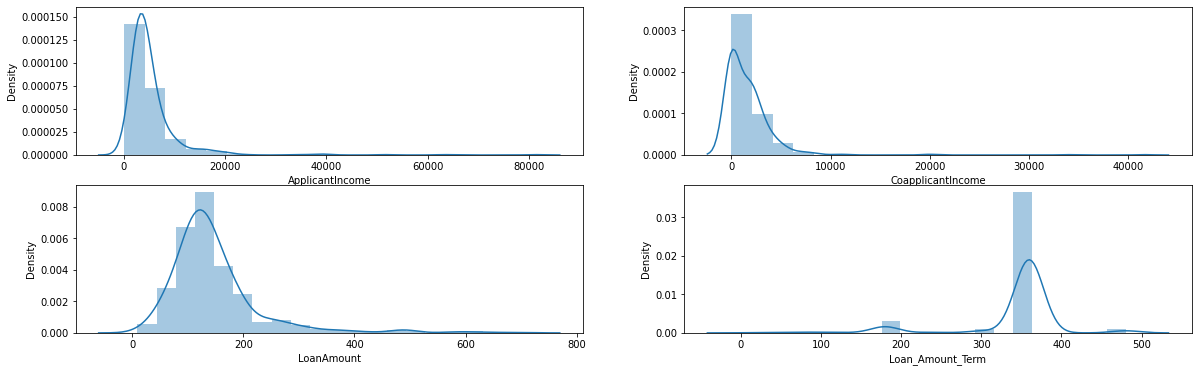

In [42]:
# Checking distribtions of numerical data 
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.distplot(train['ApplicantIncome'],bins=20, kde= True)

plt.subplot(2,2,2)
sns.distplot(train['CoapplicantIncome'],bins=20, kde= True)

plt.subplot(2,2,3)
sns.distplot(train['LoanAmount'],bins=20, kde= True)

plt.subplot(2,2,4)
sns.distplot(train['Loan_Amount_Term'],bins=20, kde= True)

plt.show()

In Histogram:
  - ApplicantIncome : Right skewed
  - CoapplicantIncome: Right skewed
  - LoanAmount: Right skewed
  - Loan_Amount_Term: Kind of a bimodal shape; Most of values lies between 300 and 400 and second most values near about 200.Totally dispersed values

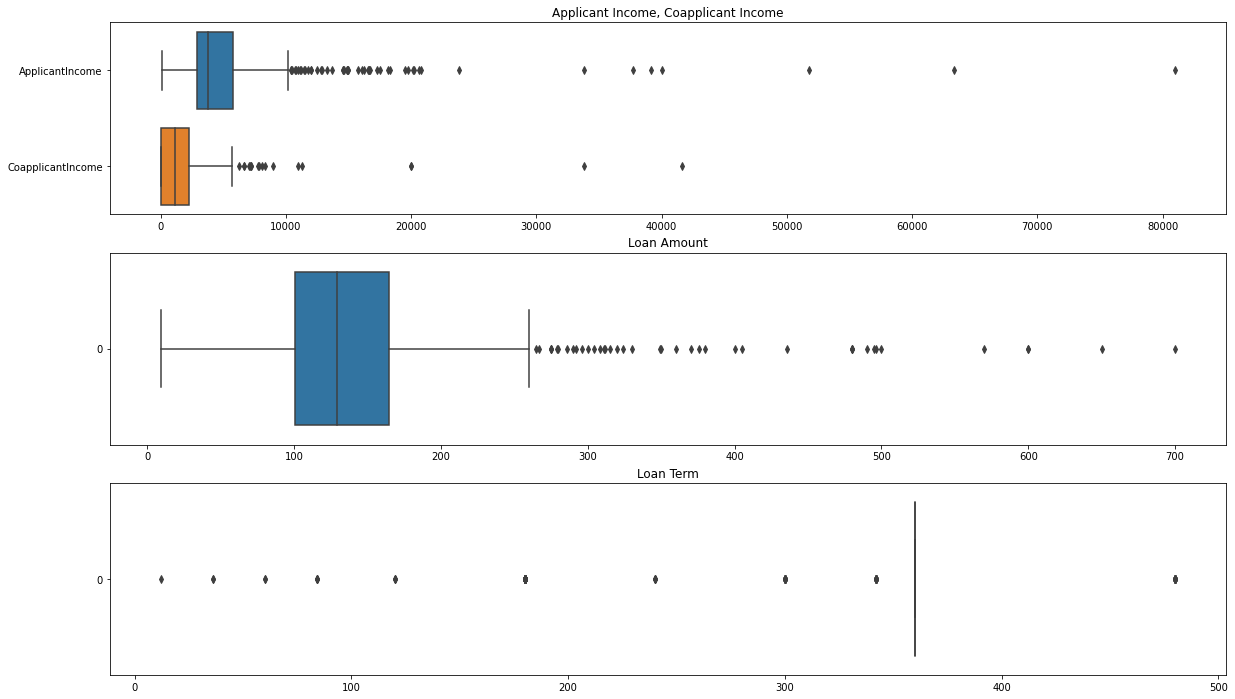

In [43]:
plt.figure(figsize=(20,12))
one = plt.subplot(3,1,1)
sns.boxplot(data=train[['ApplicantIncome','CoapplicantIncome']], orient='h')
one.set_title("Applicant Income, Coapplicant Income")

two = plt.subplot(3,1,2)
sns.boxplot(data=train['LoanAmount'], orient='h')
two.set_title("Loan Amount")

third = plt.subplot(3,1,3)
sns.boxplot(data=train['Loan_Amount_Term'], orient='h')
third.set_title("Loan Term")

plt.show()

In Boxplot:
  - Applicant, Coapplicant Income, Loan Amount, Loan Amount Term have outliers
  - In banking system while giving loan Applicant's Income and Coapplicant's Income both are important to consider. So we can analyze them collectively.

In [45]:
# We can add Applicant's and coapplicant's income for further operations.
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


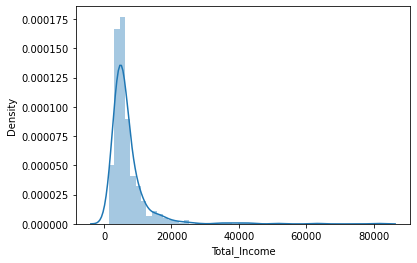

In [46]:
# We will check histogram and box
sns.distplot(train['Total_Income'],kde=True)
plt.show()

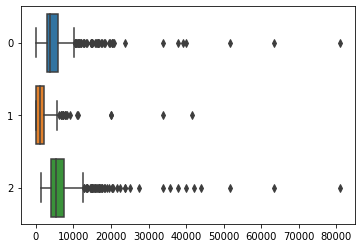

In [47]:
sns.boxplot(data=[train['ApplicantIncome'],train['CoapplicantIncome'],train['Total_Income']], orient = 'h')
plt.show()

In [48]:
# Mean and Median values
print("ApplicantIncome: Mean=",train['ApplicantIncome'].mean()," Median=",train['ApplicantIncome'].median())
print("CoapplicantIncome: Mean=",train['CoapplicantIncome'].mean()," Median=",train['CoapplicantIncome'].median())
print("Total Income: Mean",train['Total_Income'].mean()," Median=",train['Total_Income'].median())


ApplicantIncome: Mean= 5403.459283387622  Median= 3812.5
CoapplicantIncome: Mean= 1621.2457980271008  Median= 1188.5
Total Income: Mean 7024.705081414722  Median= 5416.5


## **Dealing with outlier**

In [49]:
#IQR for numerical columns:ApplicantIncome','CoapplicantIncome, LoanAmount, Loan_Amount_Term

q1_ApplicantIncome=np.quantile(train['ApplicantIncome'],0.25) #25
q2_ApplicantIncome=np.quantile(train['ApplicantIncome'],0.50) #50
q3_ApplicantIncome=np.quantile(train['ApplicantIncome'],0.75) #75

q1_CopplicantIncome=np.quantile(train['CoapplicantIncome'],0.25) #25
q2_CopplicantIncome=np.quantile(train['CoapplicantIncome'],0.50) #50
q3_CopplicantIncome=np.quantile(train['CoapplicantIncome'],0.75) #75


q1_LoanAmount=np.quantile(train['LoanAmount'],0.25) #25
q2_LoanAmount=np.quantile(train['LoanAmount'],0.50) #50
q3_LoanAmount=np.quantile(train['LoanAmount'],0.75) #75


q1_Loan_Amount_Term=np.quantile(train['Loan_Amount_Term'],0.25) #25
q2_Loan_Amount_Term=np.quantile(train['Loan_Amount_Term'],0.50) #50
q3_Loan_Amount_Term=np.quantile(train['Loan_Amount_Term'],0.75) #75

iqr_ApplicantIncome = q3_ApplicantIncome - q1_ApplicantIncome
iqr_CoapplicantIncome = q3_CopplicantIncome -q1_CopplicantIncome
iqr_LoanAmount= q3_LoanAmount-q1_LoanAmount
iqr_Loan_Amount_Term = q3_Loan_Amount_Term -q1_Loan_Amount_Term

In [50]:
upper_applicant=q3_ApplicantIncome + (1.5 *iqr_ApplicantIncome)
lower_applicant= q1_ApplicantIncome - (1.5 *iqr_ApplicantIncome)

In [51]:
iqr_ApplicantIncome,iqr_CoapplicantIncome,iqr_LoanAmount,iqr_Loan_Amount_Term

(2917.5, 2297.25, 64.5, 0.0)

In [52]:
# Clean data
# drop missing values

concated_train_test.dropna(axis=0,inplace=True)
concated_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [53]:
concated_train_test.index=concated_train_test['Loan_ID']
concated_train_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [54]:
concated_train_test.drop('Loan_ID',axis=1,inplace=True)

In [55]:
# Gender converting Male=0, Female=1
concated_train_test['Gender'].loc[concated_train_test['Gender']=='Male']=0
concated_train_test['Gender'].loc[concated_train_test['Gender']=='Female']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
# Married converting Yes=0, No=1
concated_train_test['Married'].loc[concated_train_test['Married']=='Yes']=0
concated_train_test['Married'].loc[concated_train_test['Married']=='No']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
# Dependents count 3+ is changing to 3
concated_train_test['Dependents'].loc[concated_train_test['Dependents']=='3+']=3

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
# Assigning Self Employeed Yes=1 and No =0
concated_train_test['Self_Employed'].loc[concated_train_test['Self_Employed']=='No']=0
concated_train_test['Self_Employed'].loc[concated_train_test['Self_Employed']=='Yes']=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
# Assigning Property Area Rural = 0, semi urban = 1 urban = 2
concated_train_test['Property_Area'].loc[concated_train_test['Property_Area']=='Rural']=0
concated_train_test['Property_Area'].loc[concated_train_test['Property_Area']=='Semiurban']=1
concated_train_test['Property_Area'].loc[concated_train_test['Property_Area']=='Urban']=2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
# Assigning Graduate = 1 and Non Graduate = 0
concated_train_test['Education'].loc[concated_train_test['Education']=='Graduate']=1
concated_train_test['Education'].loc[concated_train_test['Education']=='Not Graduate']=0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [63]:
# Assigning Loan status N=0, Y=1
concated_train_test['Loan_Status'].loc[concated_train_test['Loan_Status']=='N'] = 0
concated_train_test['Loan_Status'].loc[concated_train_test['Loan_Status']=='Y'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
# Converting data type from object to relavent type and removing unwanted attributes

concated_train_test=concated_train_test.astype({'Gender':int,'Married':int, 'Dependents':int,'Education':int,'Self_Employed':int,'Property_Area':int, 'Loan_Status':int})
concated_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8+ KB


In [65]:
# We will check correlation
correlation_matrix = concated_train_test.corr()
corr_greater_than =  correlation_matrix[correlation_matrix>0.3]
corr_greater_than

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,0.349424,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.49531,NaN,NaN,NaN,NaN
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
LoanAmount,NaN,NaN,NaN,NaN,NaN,0.49531,NaN,1.00000,NaN,NaN,NaN,NaN
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.52939


In [66]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


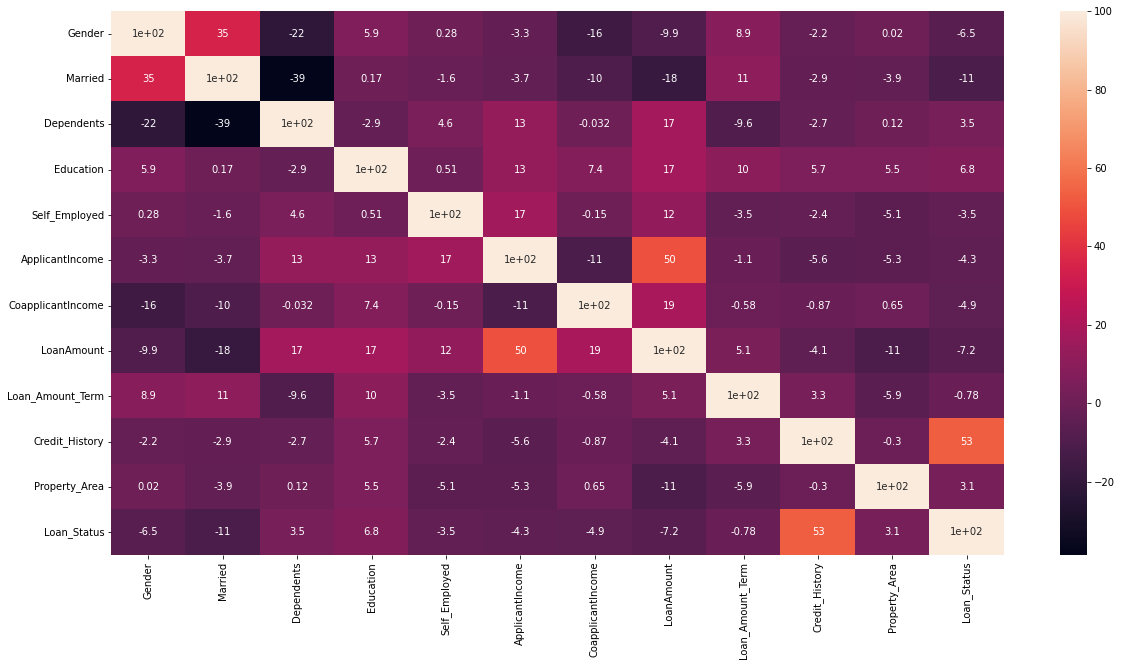

' \nCorrelation coefficient shows relationship between two variables.\n- Positive values: Directly related\n- Negative values: Inversely related\n- Zero: No linear relation\n\n'

In [67]:
# Showing Correlation using Graphics
# We can use heatmap function of seaborn module
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix*100,annot=True)
plt.show()

''' 
Correlation coefficient shows relationship between two variables.
- Positive values: Directly related
- Negative values: Inversely related
- Zero: No linear relation

'''

In [68]:
'''
In above heatmap orange boxes having values nearly 50 and above are directly related.
1. Loan amount is positively related to Applicant income
2. Loan status is positively related to credit history

'''

'\nIn above heatmap orange boxes having values nearly 50 and above are directly related.\n1. Loan amount is positively related to Applicant income\n2. Loan status is positively related to credit history\n\n'

<Figure size 7200x3600 with 0 Axes>

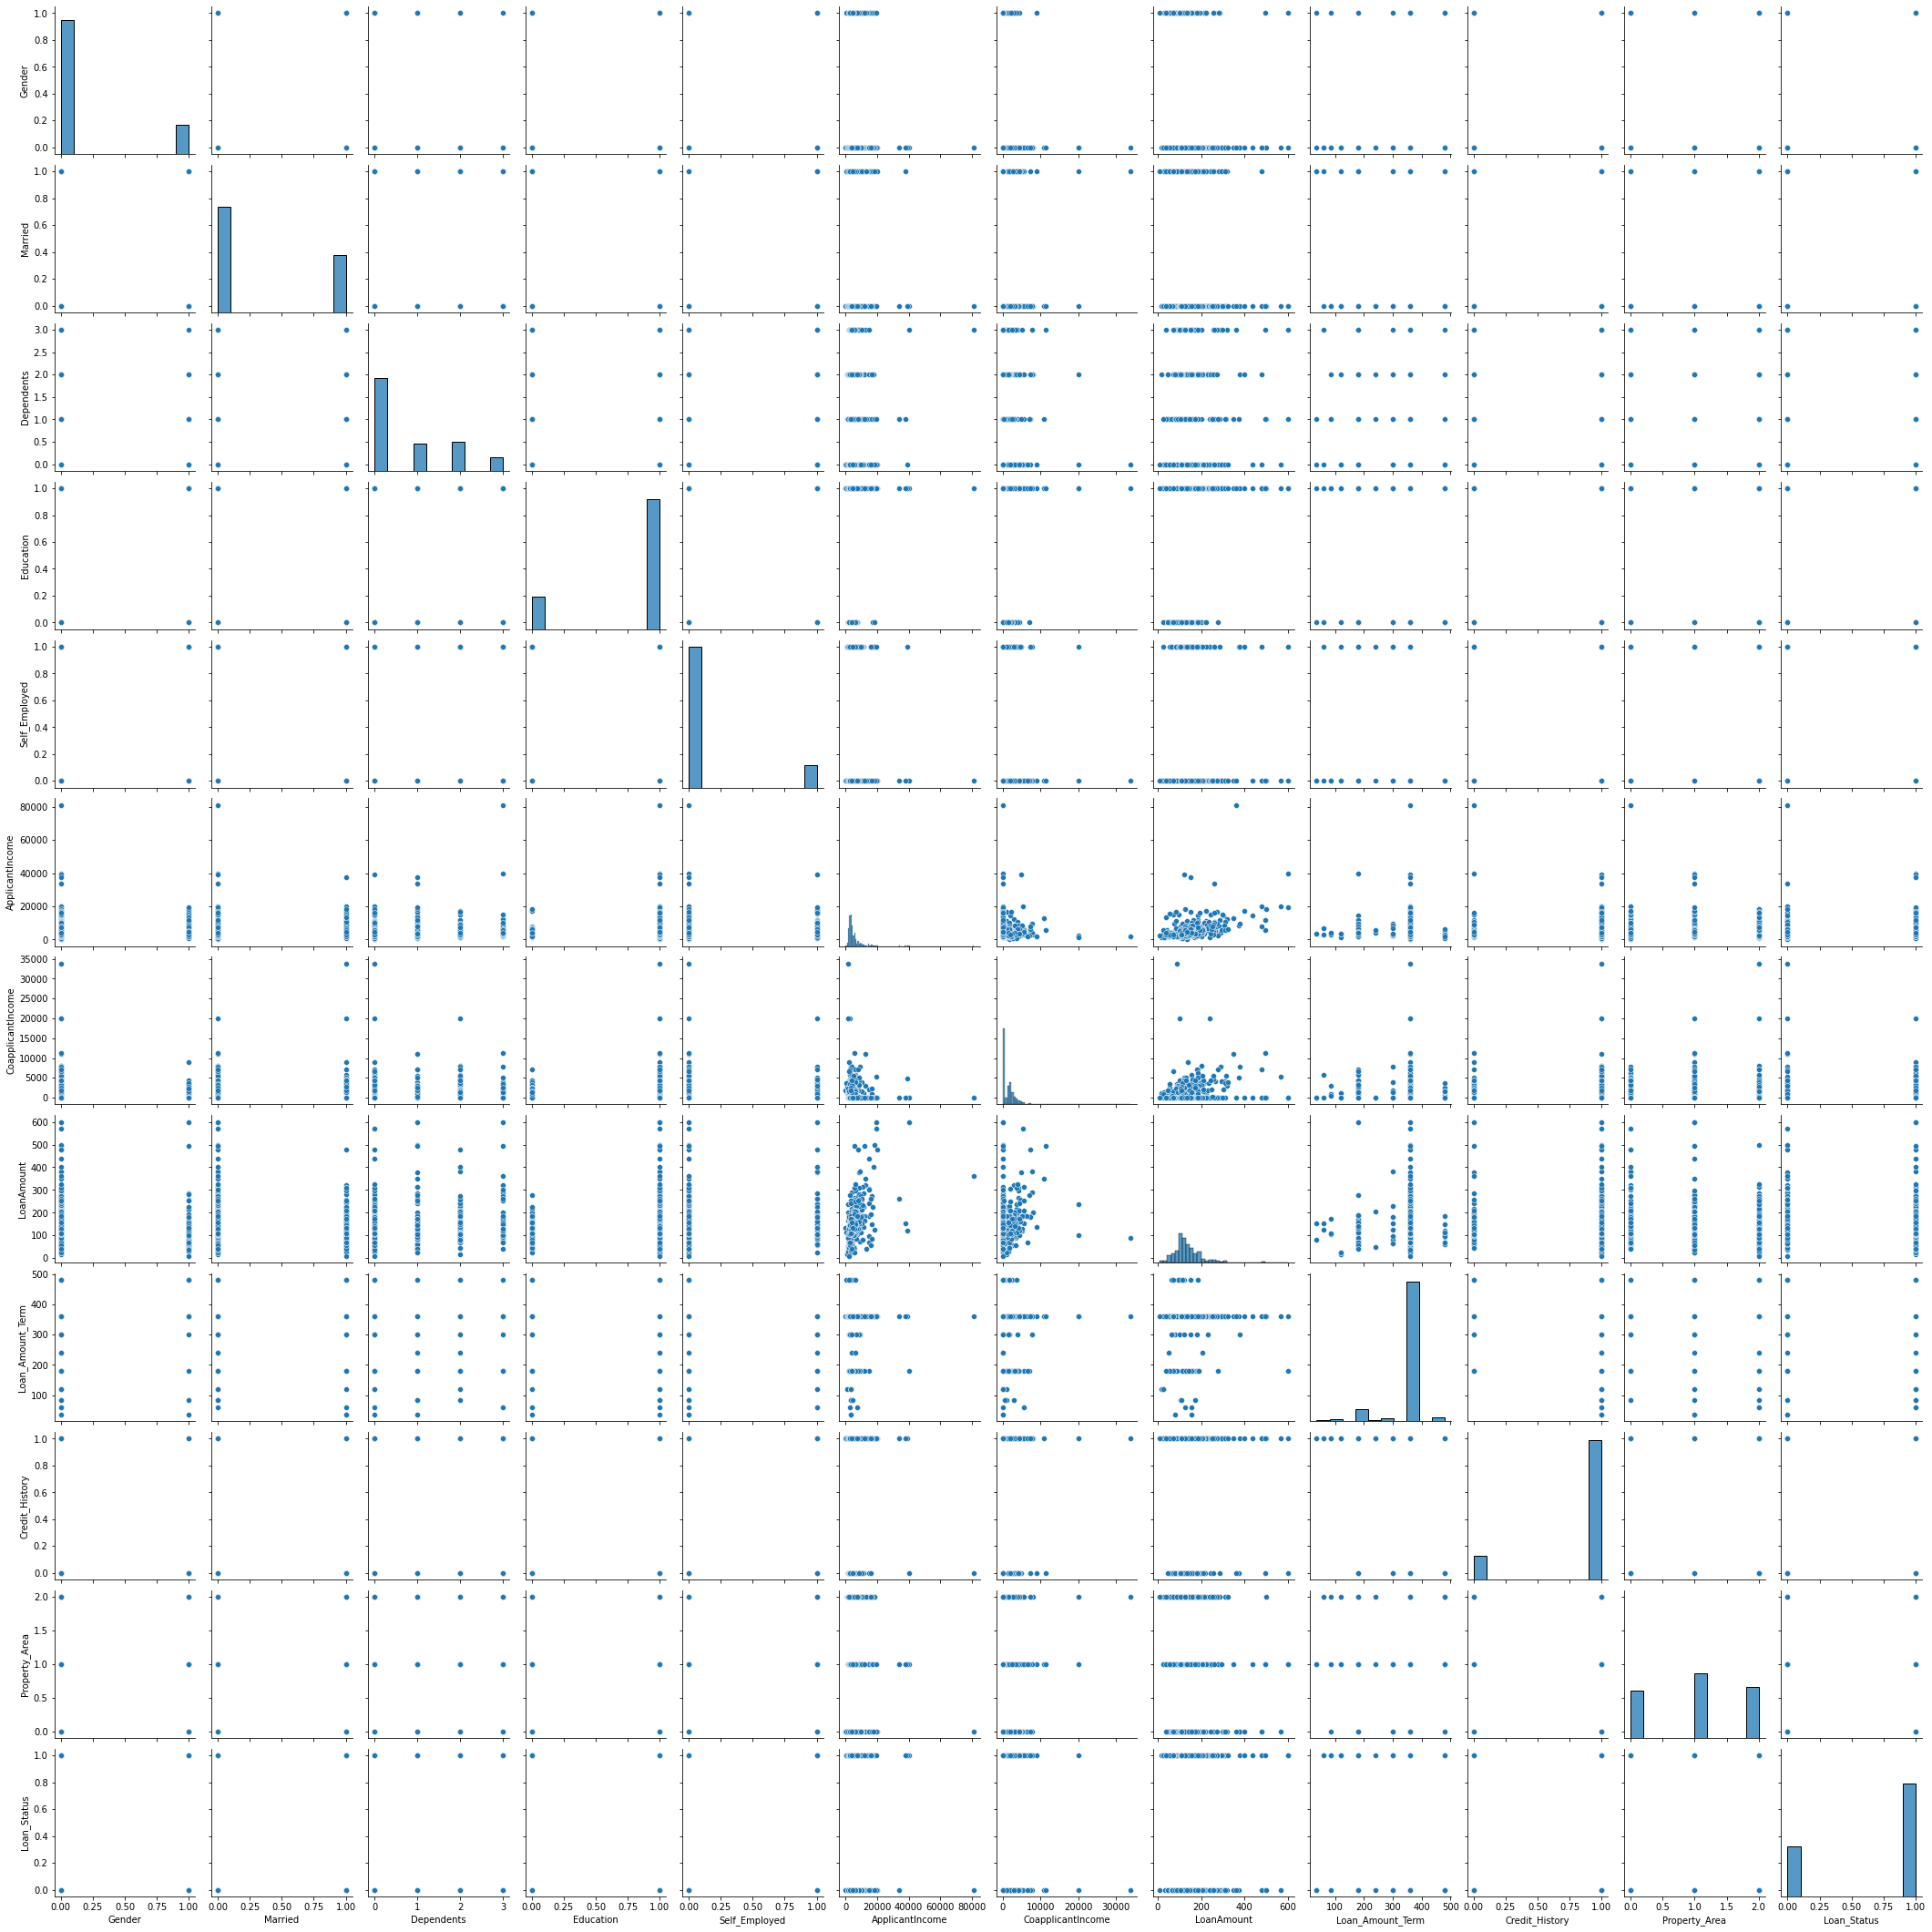

In [69]:
# 3. How do the the loan statuses compare? i.e. what is the distrubition of each?
plt.figure(figsize=(100,50))
sns.pairplot(concated_train_test)
plt.show()

In [70]:
# 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

concated_train_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,0,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,0,0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,0,0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,0,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,0,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## EDA

In [71]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,0,0,0,1,0,5849,0.0,147.0,360.0,1.0,2,1,5849.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [72]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,0,0,0,1,0,5849,0.0,147.0,360.0,1.0,2,1.0,5849.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0.0,6091.0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1.0,3000.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1.0,4941.0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1.0,6000.0


### Sweetviz

In [82]:
!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


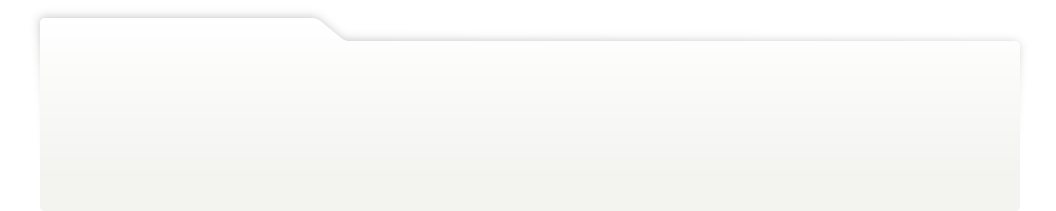
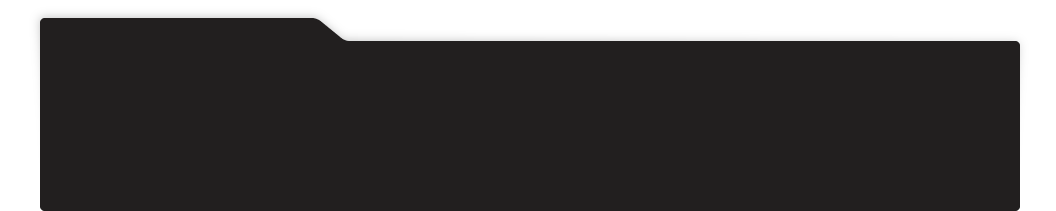
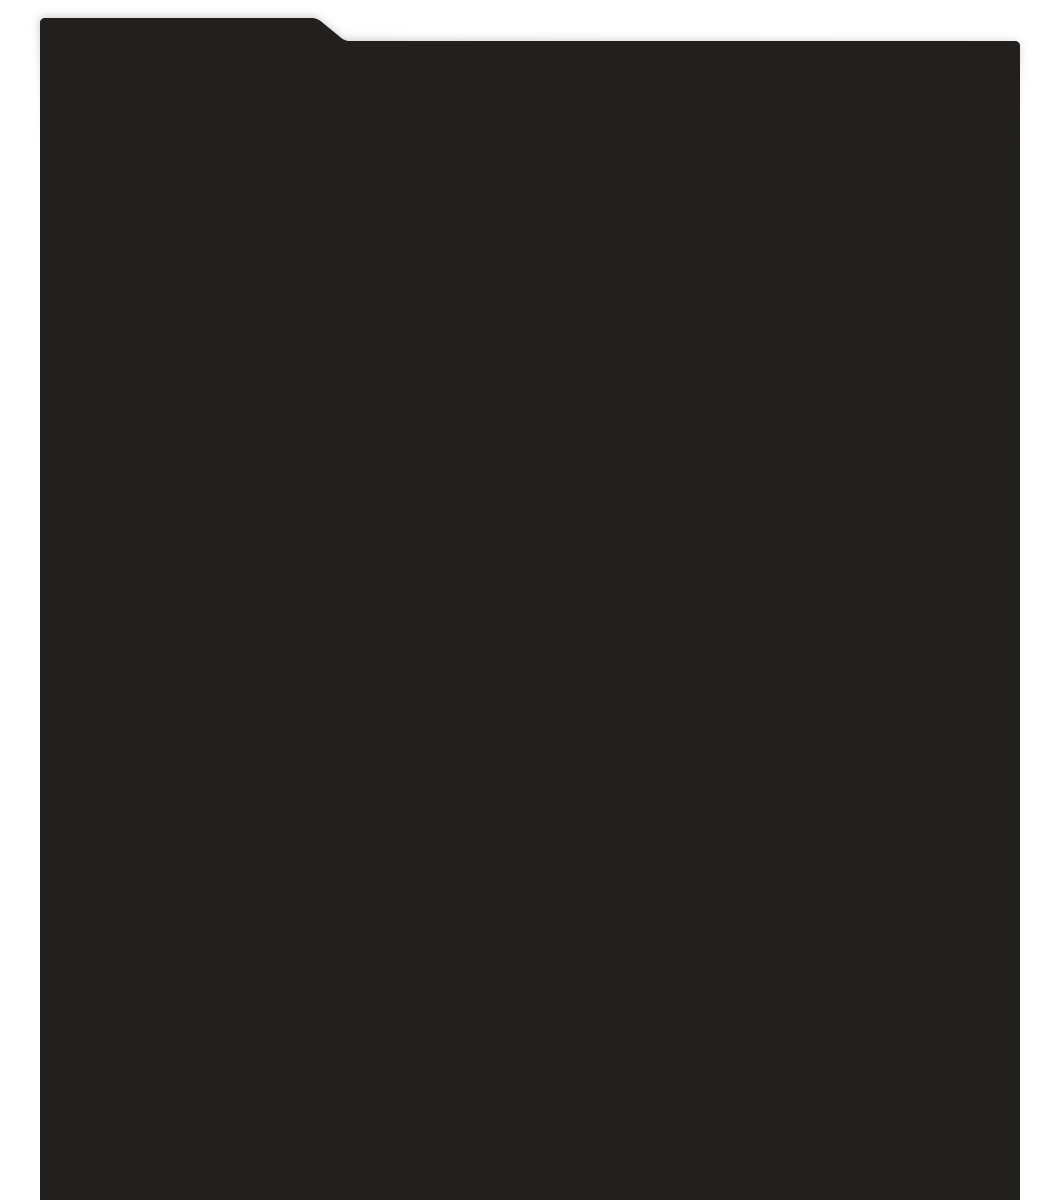
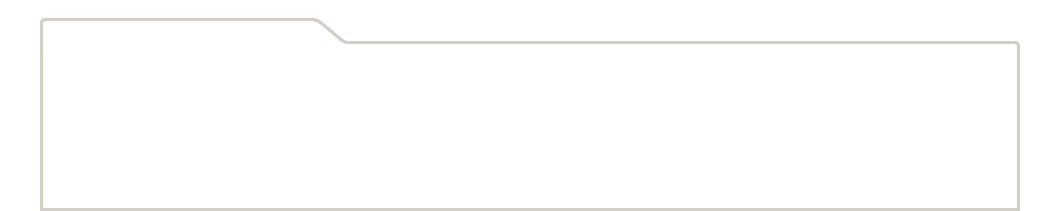
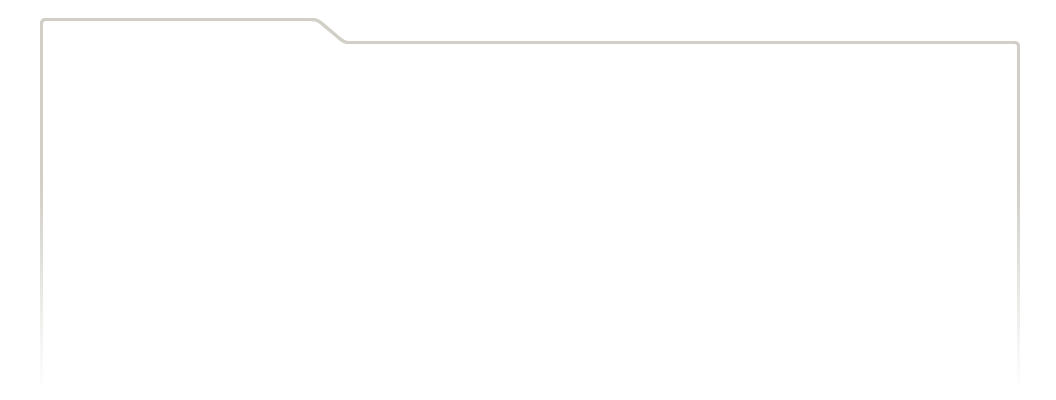
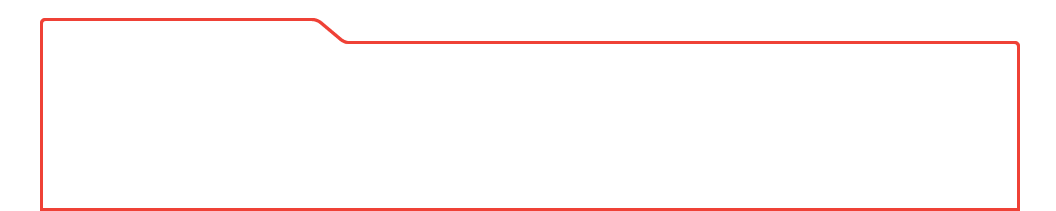
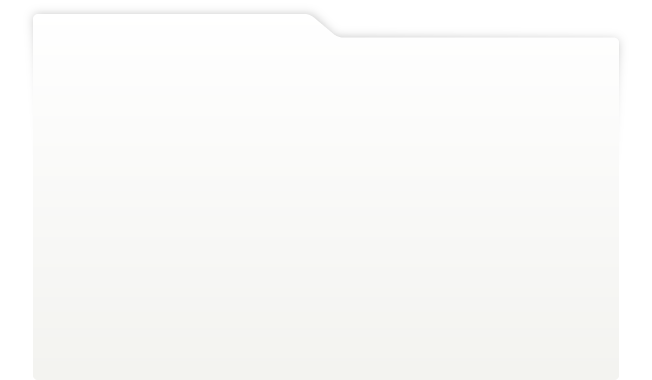
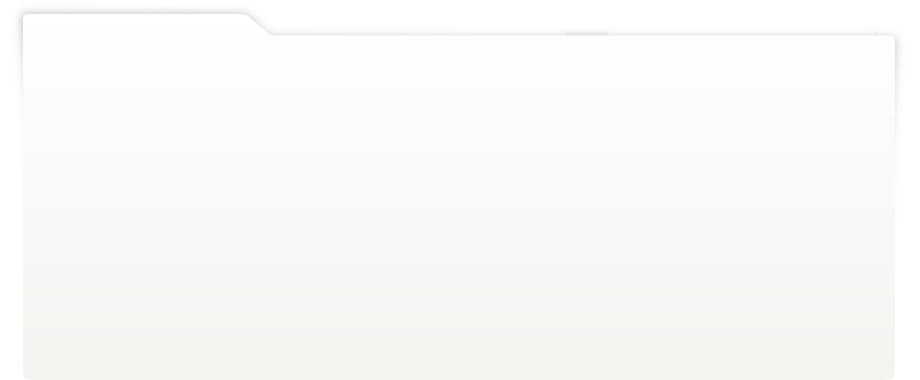
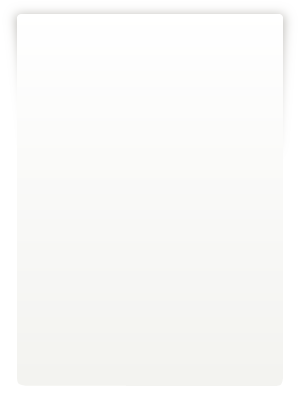
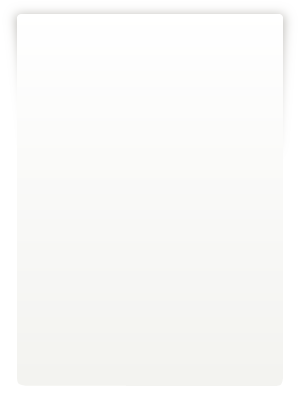
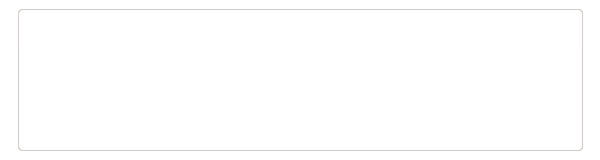
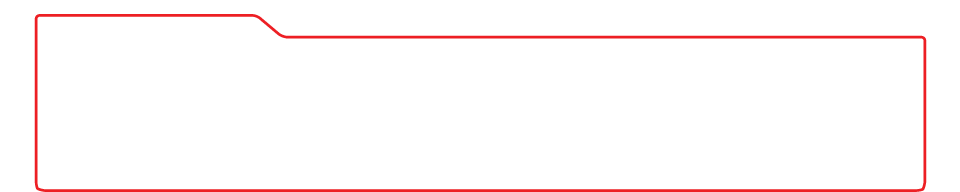
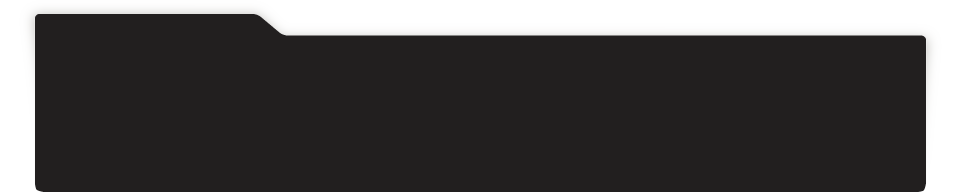
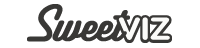
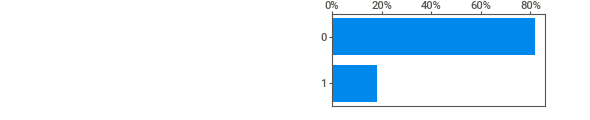
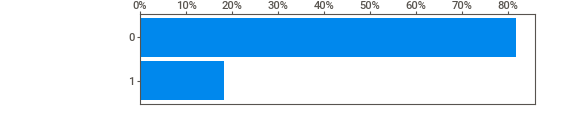
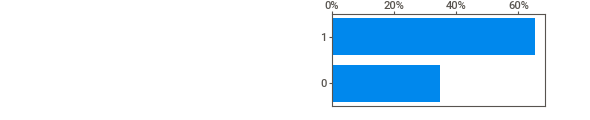
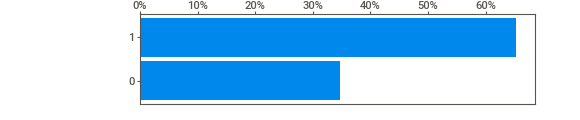
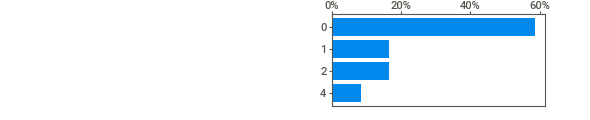
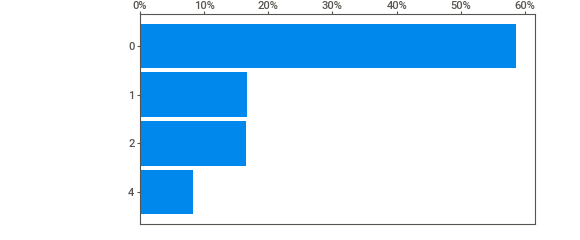
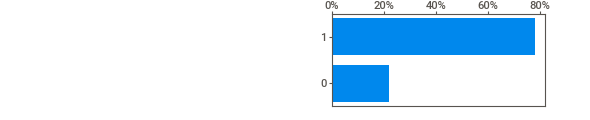
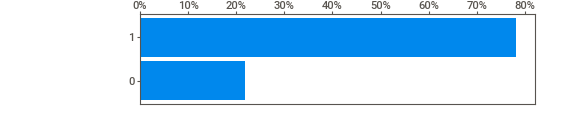
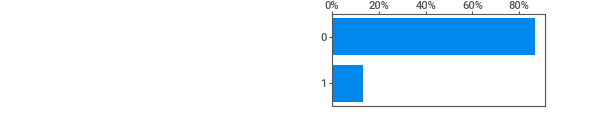
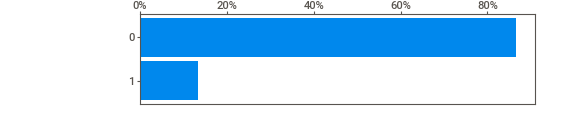
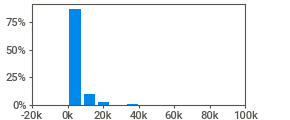
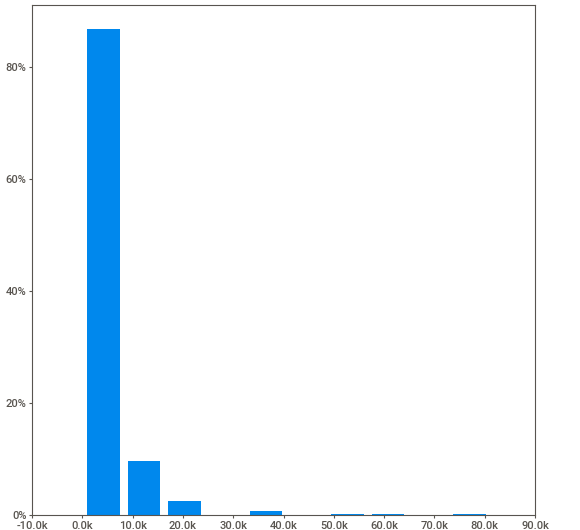
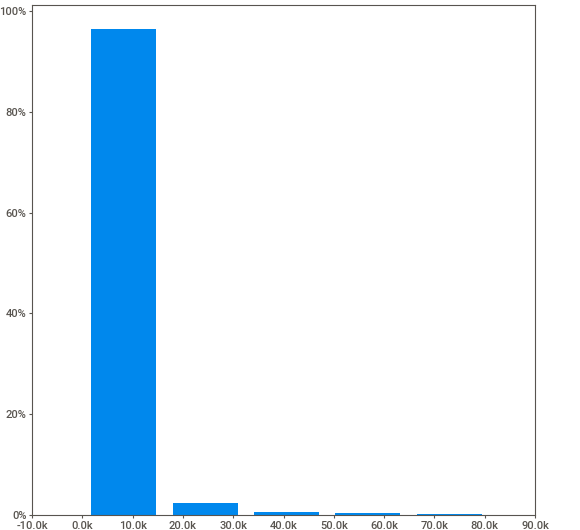
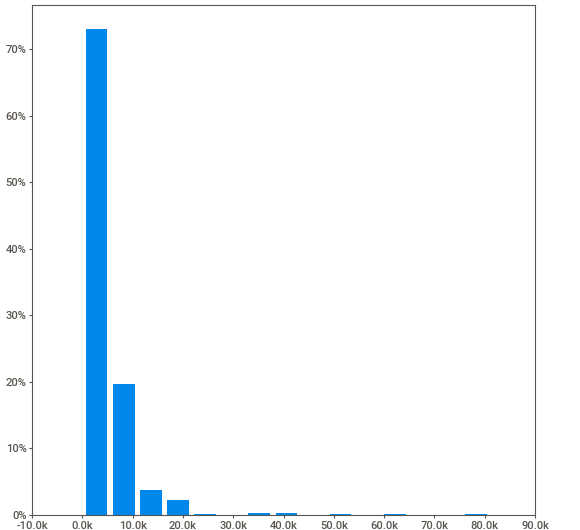
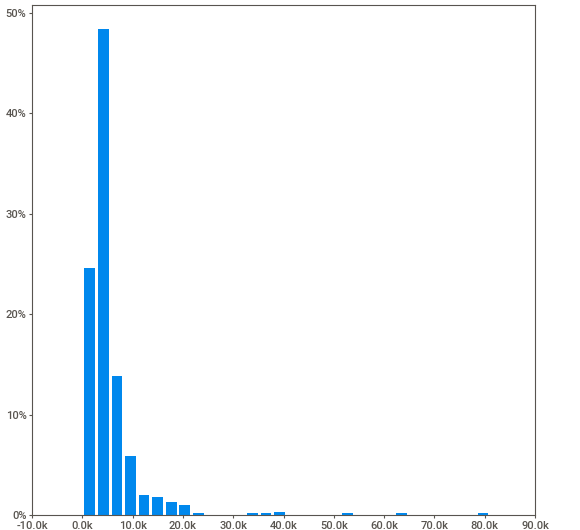
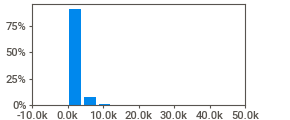
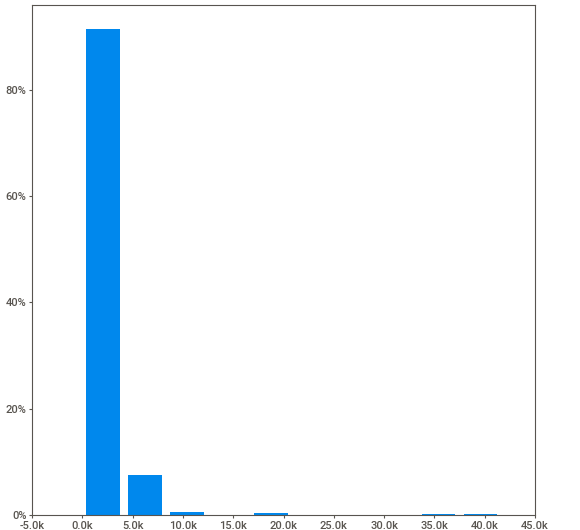
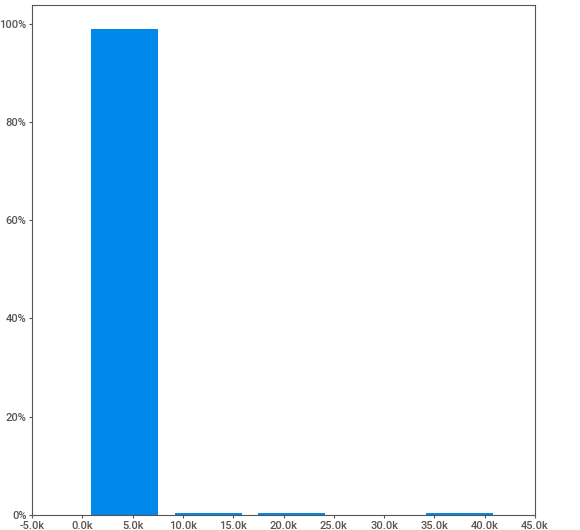
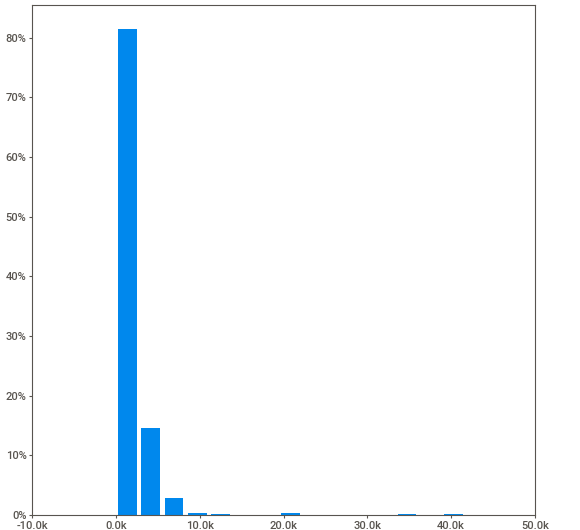
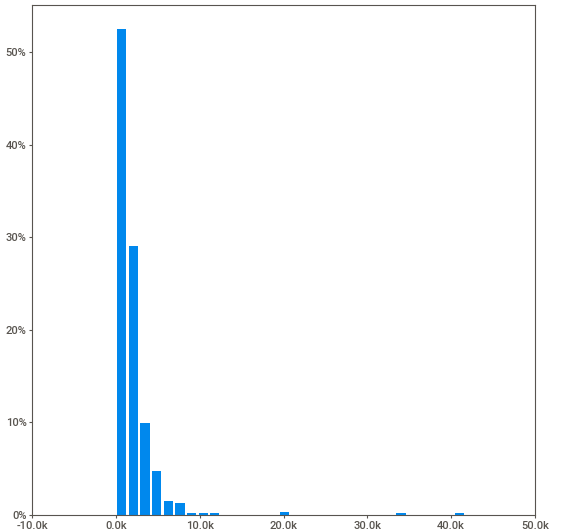
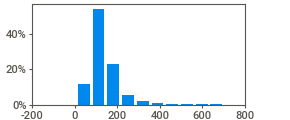
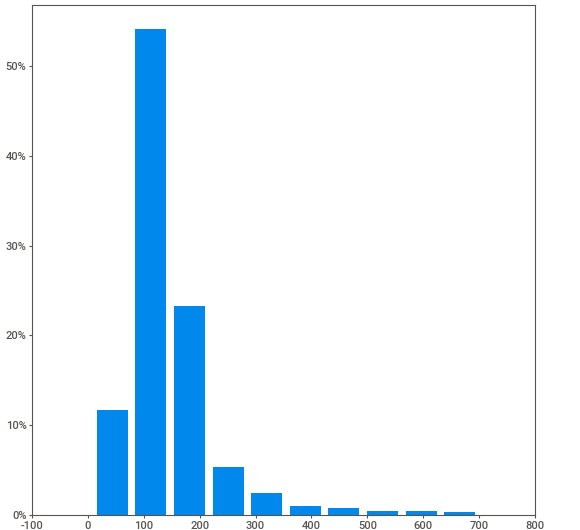
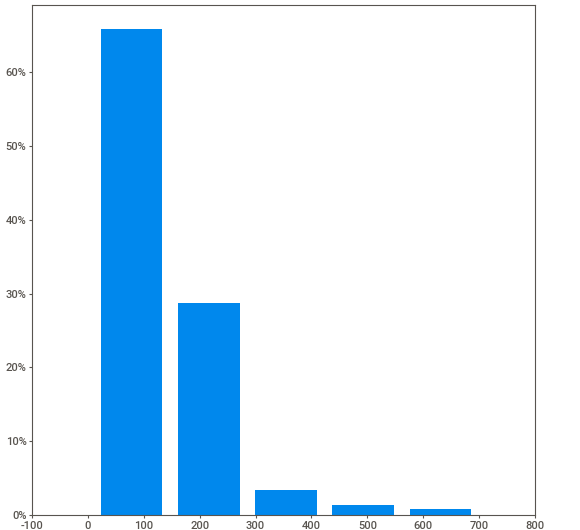
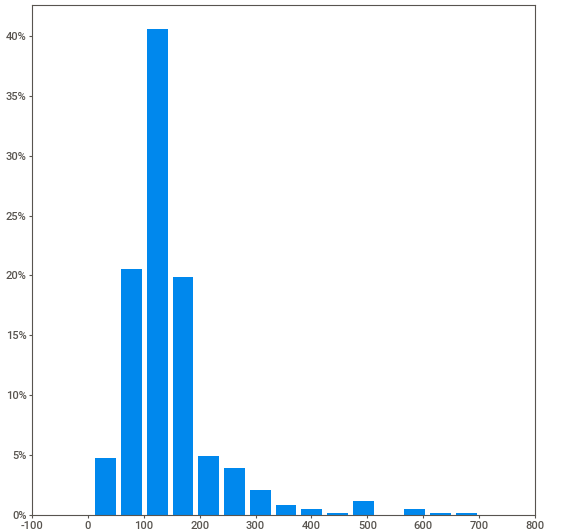
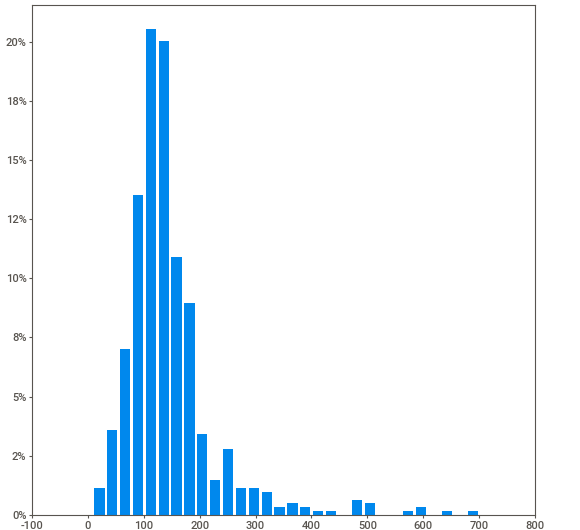
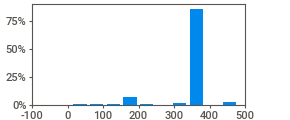
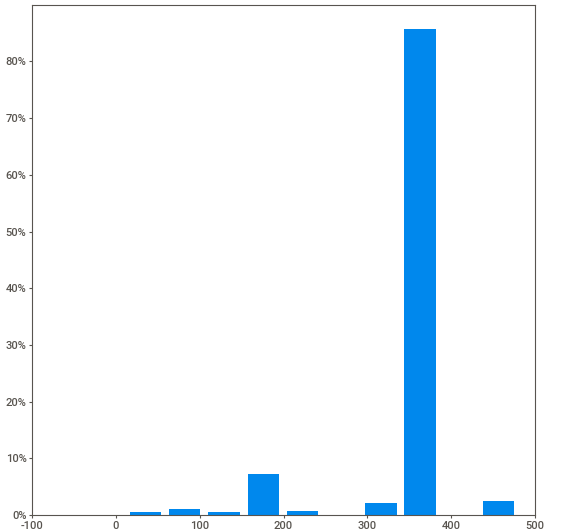
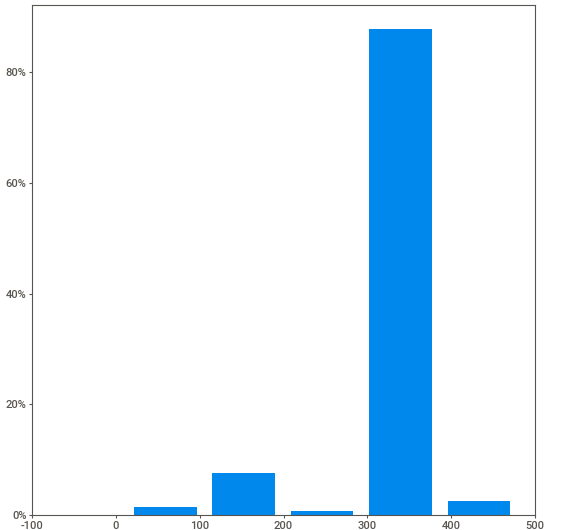
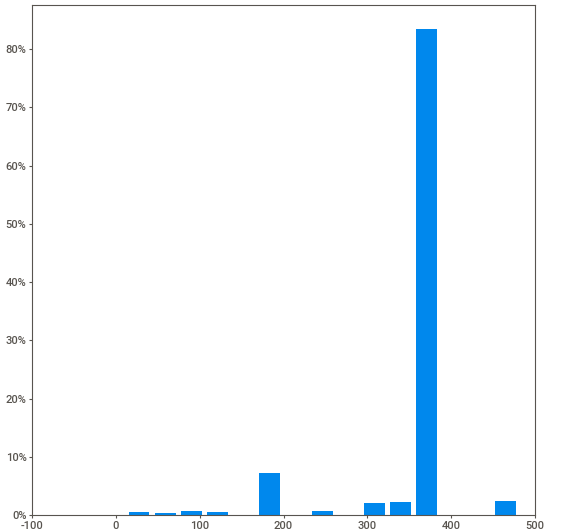
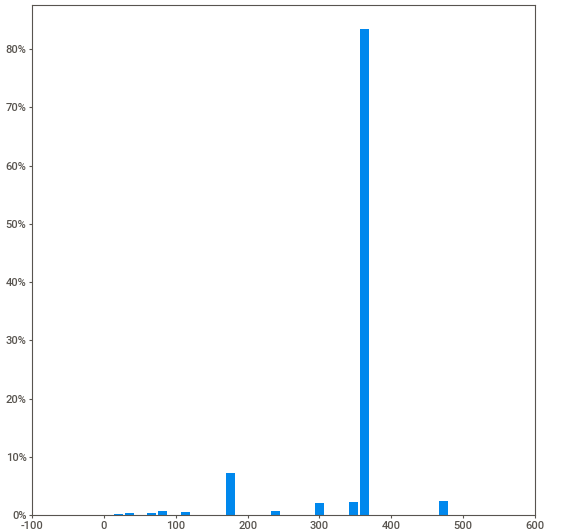
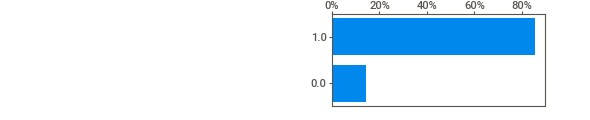
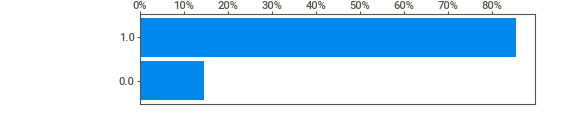
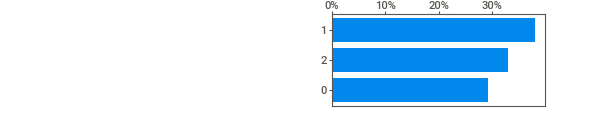
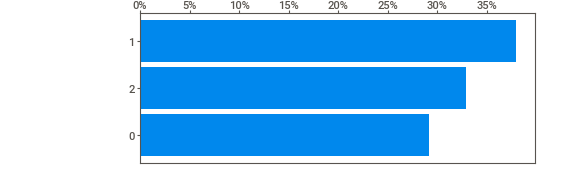
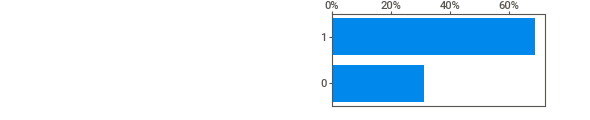
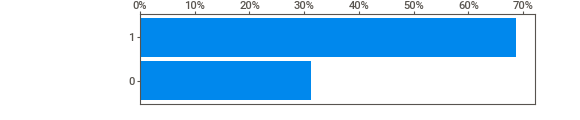
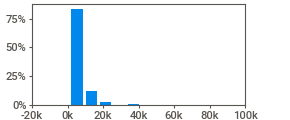
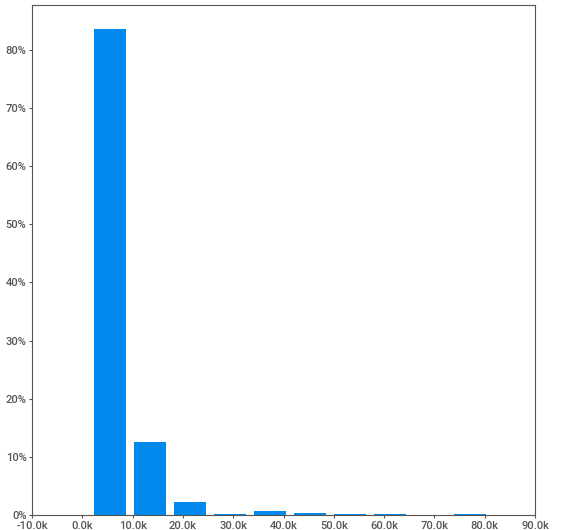
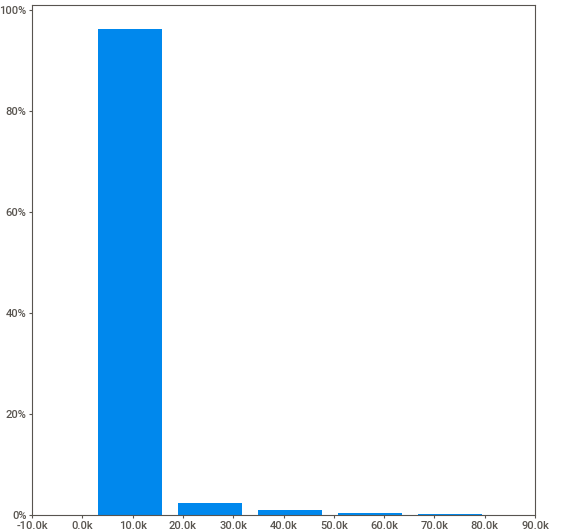
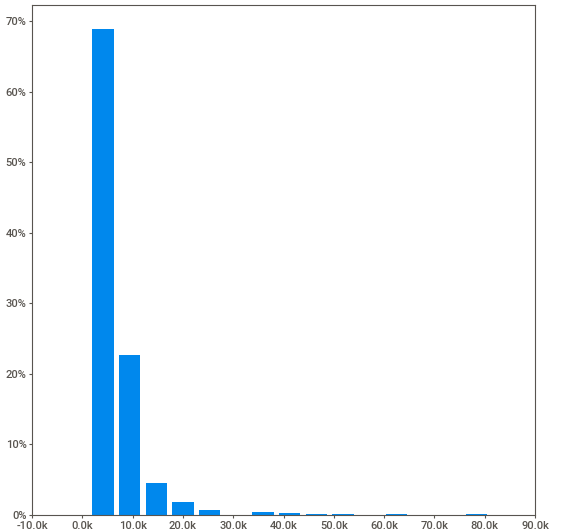
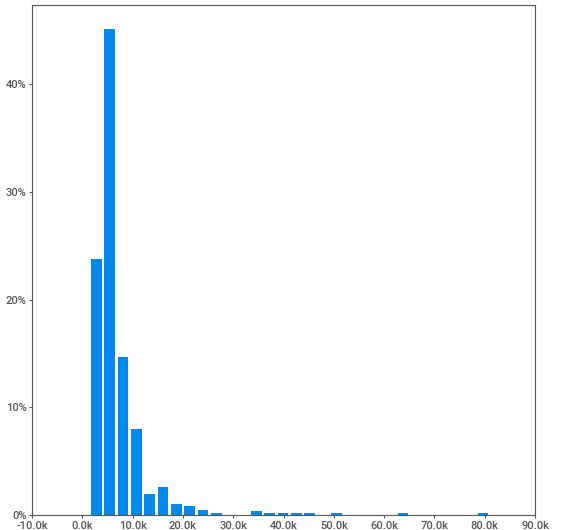
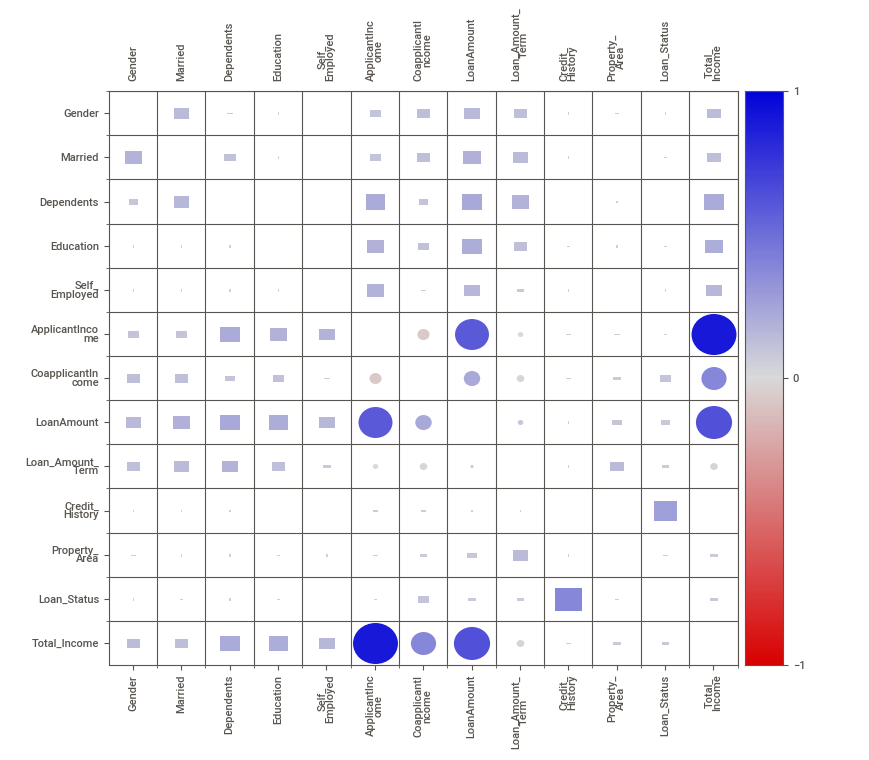
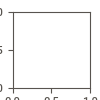

In [84]:
import sweetviz
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()